# Tutorial 05: Homework

### Assignement
  * For the attached data (cleaned data from the 3rd tutorial) try to use linear regression (or ridge regression, if you will) AND decision tree regressor (or boosted tree) applied on features given by PCA.
  * Try to select as less as possible features so that the results are comparably good (in terms of RMSLE) to the results obtained in the 3rd tutorial (RMSLE around 0.12).
  * Experiment with the feature selection:
    * Has removing indicator or discrete features a positive influence?
    * Are the first principal components always the best choice?

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [11]:
# loading data
data = pd.read_csv('dataHW05.csv', index_col=0)
#data.head()

In [12]:
def lin_and_tree(data):
    dtrain, dtest = train_test_split(data, test_size=0.25, random_state=458)
    X = dtrain.drop(['SalePrice'], axis = 1, errors = 'ignore')
    y = dtrain.SalePrice
    Xtest = dtest.drop(['SalePrice'], axis = 1, errors = 'ignore')
    ytest = dtest.SalePrice
    
    clf1 = LinearRegression()
    clf1.fit(X, y) 
    
    lin_RMSLE = np.sqrt(mean_squared_error(clf1.predict(Xtest), ytest))
    
    clf2 = DecisionTreeRegressor()
    clf2.fit(X, y) 

    tree_RMSLE = np.sqrt(mean_squared_error(clf2.predict(Xtest), ytest))
    return lin_RMSLE, tree_RMSLE

In [13]:
lin_list = pd.Series([], name='LinReg')
tree_list = pd.Series([], name='DecTree')
for i in range(1,50):
    without_price = data.drop(["SalePrice"], axis=1)
    pca = PCA(n_components = i)
    pca.fit_transform(without_price)
    without_price = pca.transform(without_price)
    transformed = pd.concat([pd.DataFrame(without_price), data[["SalePrice"]]], axis=1)
    lin, tree = lin_and_tree(transformed)
    lin_list.at[i] = lin
    tree_list.at[i]= tree
orig_rmsle = pd.concat([lin_list, tree_list], axis=1)

LinReg ideal num of components:
43
RMSLE of min num of components:
0.17773119056347206
TreeDec ideal num of components:
20
RMSLE of min num of components:
0.2323025567231197


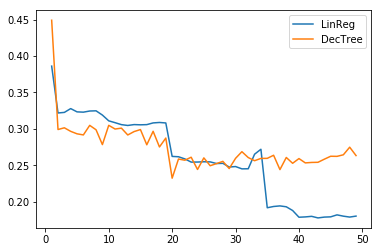

In [14]:
orig_rmsle.plot()
print('LinReg ideal num of components:')
print(lin_list.idxmin())
print('RMSLE of min num of components:')
print(lin_list.min())

print('TreeDec ideal num of components:')
print(tree_list.idxmin())
print('RMSLE of min num of components:')
print(tree_list.min())

PCA has best results with > 40 components. Linear regression has better results.

## Selecting features/Cleaning

In [15]:
# Dropping useless column ID
data_mod = data.drop('Id', axis=1) 

# Outliers
data_mod = data_mod[(data_mod['TotalBsmtSF']<3000) & (data_mod['TotalBsmtSF'] > 0) ]
data_mod = data_mod.reset_index() # For fix bug with pandas

In [16]:
lin_list = pd.Series([], name='LinReg')
tree_list = pd.Series([], name='DecTree')
for i in range(1,50):
    without_price = data_mod.drop(["SalePrice"], axis=1)
    pca = PCA(n_components = i)
    pca.fit_transform(without_price)
    without_price = pca.transform(without_price)
    transformed = pd.concat([pd.DataFrame(without_price), data_mod[["SalePrice"]]], axis=1)
    lin, tree = lin_and_tree(transformed)
    lin_list.at[i] = lin
    tree_list.at[i]= tree
edited_rmsle = pd.concat([lin_list, tree_list], axis=1)

LinReg ideal num of components:
37
RMSLE of min num of components:
0.11997393459752748
TreeDec ideal num of components:
44
RMSLE of min num of components:
0.23696756092881652


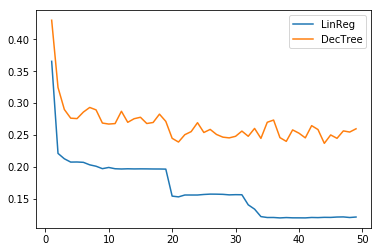

In [17]:
edited_rmsle.plot()
print('LinReg ideal num of components:')
print(lin_list.idxmin())
print('RMSLE of min num of components:')
print(lin_list.min())

print('TreeDec ideal num of components:')
print(tree_list.idxmin())
print('RMSLE of min num of components:')
print(tree_list.min())

After remove outliers linear regression has still better results. With >=34 features I got RMSLE about 0.12.

I removed column ID and some outliers. I could get better RMSLE if I removed outliers in more features.
In linear regression I got the best result with 37 features and RMSLE was under 0.12.
In decision tree regression I did not get good results, best RMSLE was about 0.23 with 41 features.